In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
df = pd.read_csv('../data/heart_disease.csv')
df.head()

,age,sex,chest_pain_type,resting_bp_s,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,st_slope,target
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,1.0,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,2.0,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,1.0,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,2.0,1.0
4,54.0,1.0,3.0,150.0,195.0,0.0,0.0,122.0,0.0,0.0,1.0,0.0


In [3]:
# Check for missing values
print(df.isnull().sum())


df.fillna(df.median(numeric_only=True), inplace=True)



age                    0
sex                    0
chest_pain_type        0
resting_bp_s           0
cholesterol            0
fasting_blood_sugar    0
resting_ecg            0
max_heart_rate         0
exercise_angina        0
oldpeak                0
st_slope               0
target                 0
dtype: int64


In [4]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical columns:", categorical_cols)

# One-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

Categorical columns: []


In [5]:
# Identify numerical columns
numerical_cols = df_encoded.select_dtypes(include=[np.number]).columns.tolist()
numerical_cols.remove('target')  # Assuming 'target' is the label

# Choose scaler
scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])


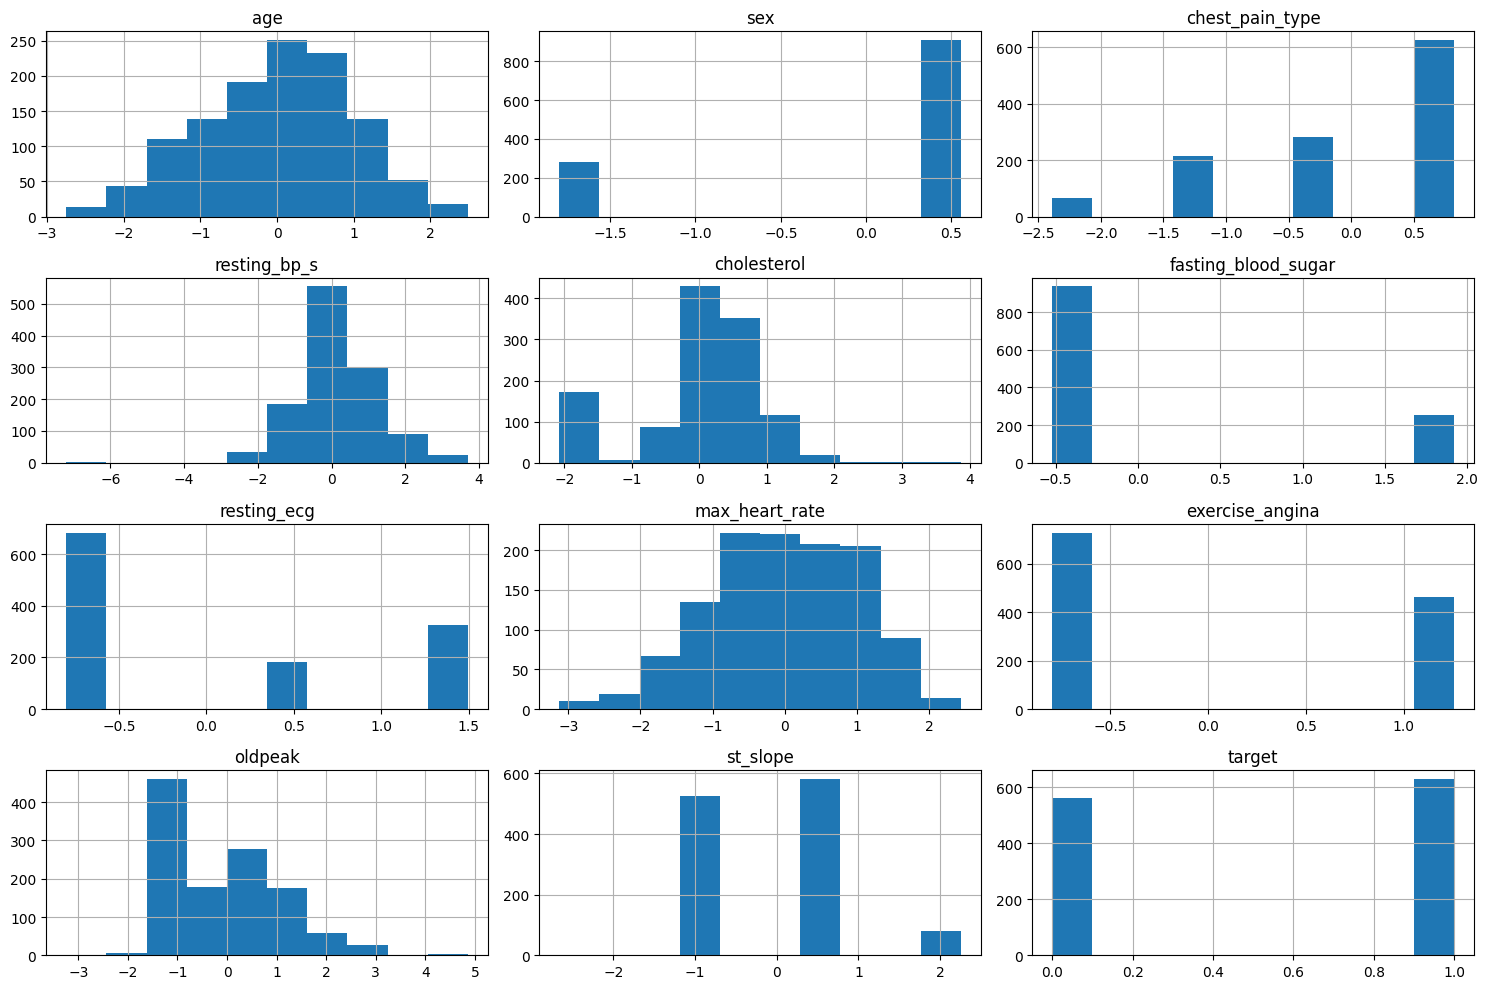

In [6]:
df_encoded.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

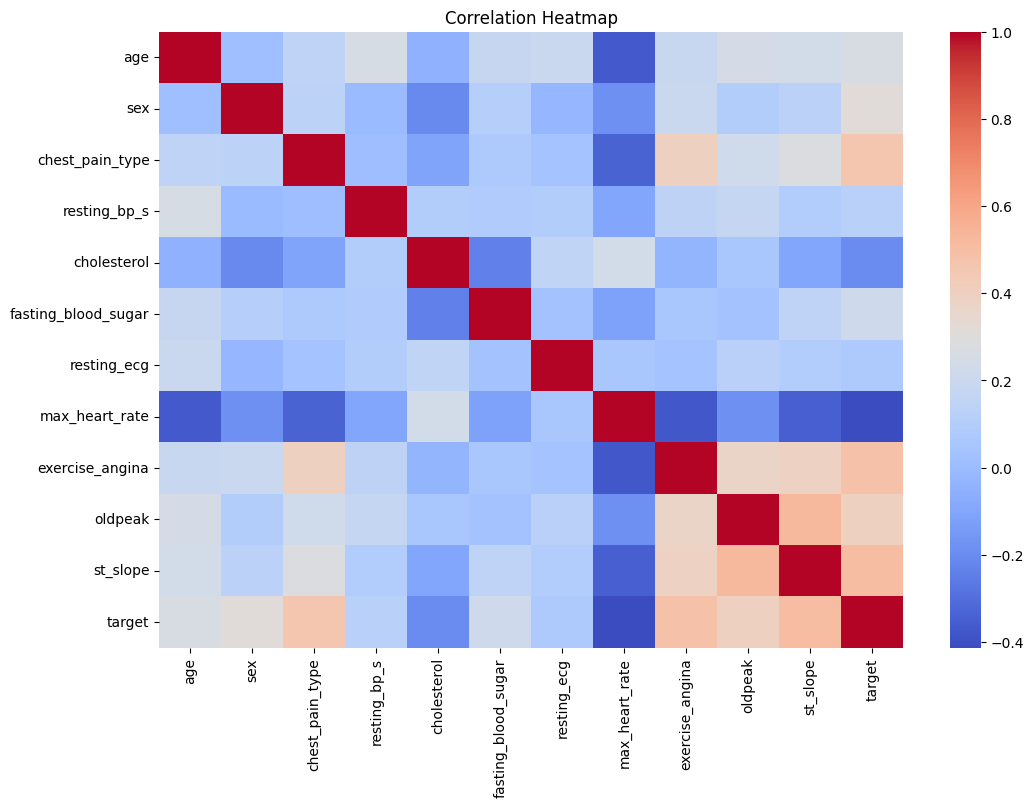

In [7]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

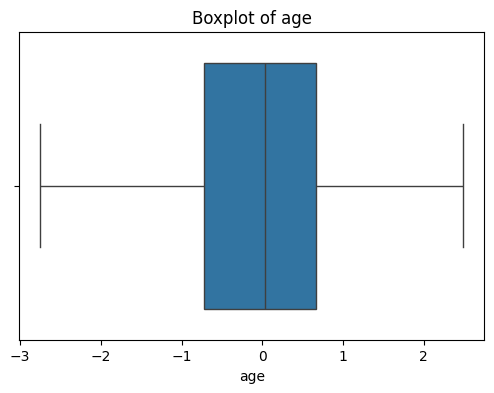

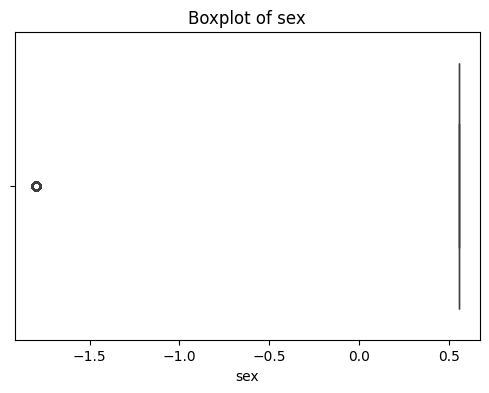

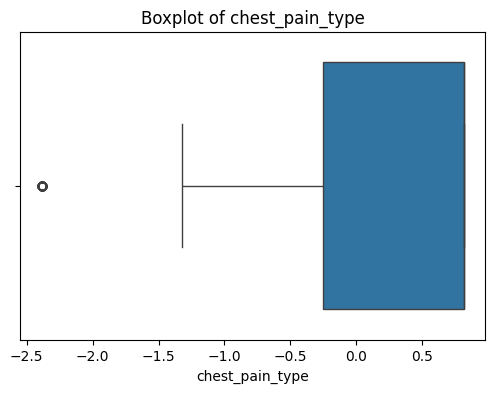

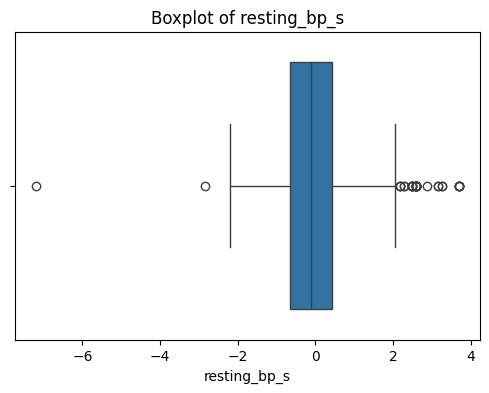

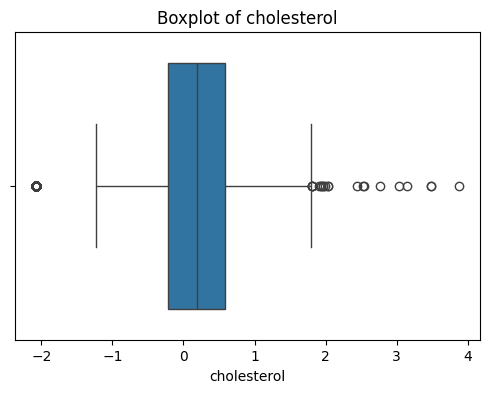

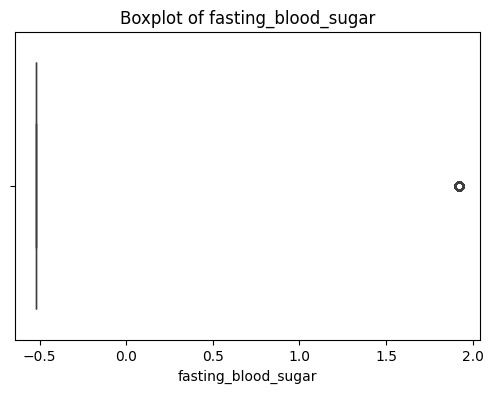

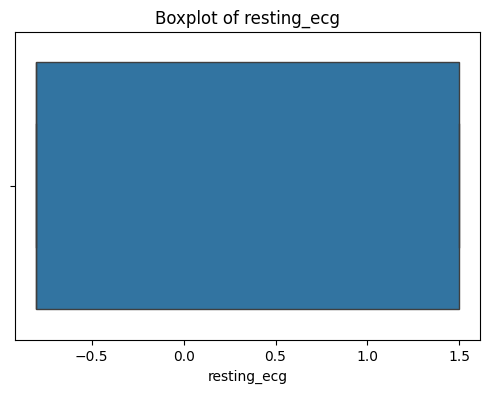

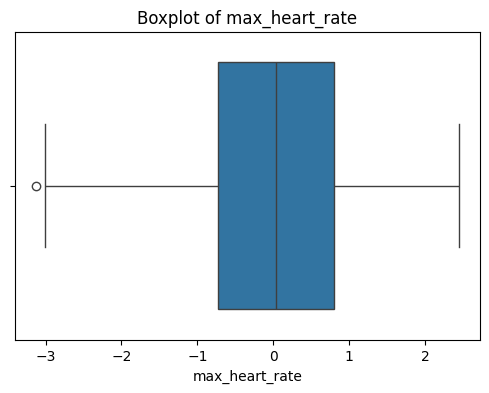

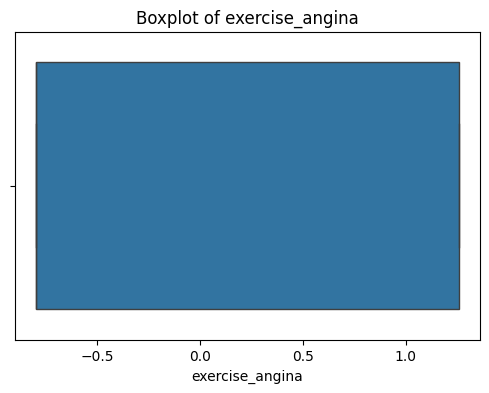

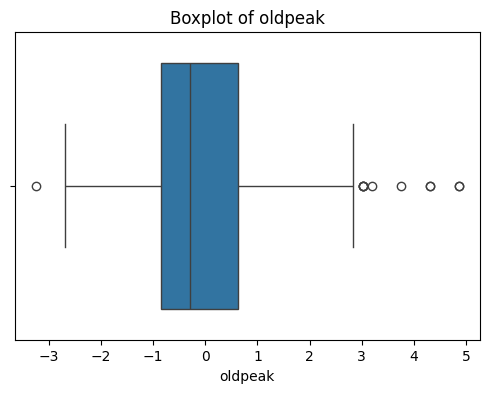

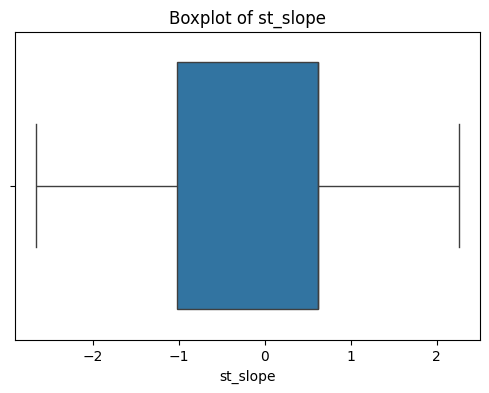

In [8]:
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df_encoded[col])
    plt.title(f'Boxplot of {col}')
    plt.show()
    

In [9]:
df_encoded.to_csv('../data/heart_disease_cleaned.csv', index=False)

In [10]:
scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

import joblib
joblib.dump(scaler, '../models/standard_scaler.pkl')
print("Scaler saved to ../models/standard_scaler.pkl")

Scaler saved to ../models/standard_scaler.pkl
